<center><b><font size=10>Cinematic Masterpieces Unveiled</font></b></center>
<center><b><font color='red' size=5>Exploring IMDB's Top 250 Movies for Trends and Insights</font></b></center>

---
### An Introduction To The Notebook. "Background"
* #### The IMDB Top 250 Movies dataset is a collection of highly acclaimed and influential movies. The dataset includes movies ranked based on user ratings on IMDB, showcasing the most beloved films by the audience.
* #### Key columns in the dataset include:
    1. ##### `Rank`: The ranking of the movie in the IMDB Top 250 list.
    2. ##### `Name`: The title of the movie.
    3. ##### `Year`: The year of release.
    4. ##### `Rating`: The average rating given by users.
    5. ##### `Genre`: The genre(s) to which the movie belongs.
    6. ##### `Certificate`: The certification or rating given to the movie (e.g., PG-13, R).
    7. ##### `Run Time`: The duration of the movie.
    8. ##### `Tag Line`: A brief and catchy phrase associated with the movie.
    9. ##### `Budget`: The estimated budget of the movie.
    10. ##### `Box Office`: The box office revenue generated by the movie.
    11. ##### `Casts`: The main cast members of the movie.
    12. ##### `Directors`: The directors of the movie.
    13. ##### `Writers`: The writers of the movie.
* #### This dataset provides a valuable resource for analyzing trends, patterns, and factors contributing to the success and enduring popularity of these cinematic masterpieces.
---
- ## What Is The Expected Content Of This Notebook?
    * #### We will mainly perform an `Exploratory Data Analysis`, and comment on the results in the `conclusions`.
    * #### We will also provide a `Time Series Analysis`, to reveal more insights about our historical data.
    * #### Determine which features have the most influence on movie ratings.
    * #### Identify the key factors contributing to highly rated movies.
---
- ## Table Of Contents:
    1. #### Importing Necessary Packages. [Go to T.1](#T.1)
    2. #### Exploratory Data Analysis. [Go to T.2](#T.2)
    3. #### Time Series Analysis. [Go to T.3](#T.3)
    4. #### Preprocessing The Data. [Go to T.4](#T.4)
    5. #### Feature Importance. [Go to T.5](#T.5)
    6. #### Conclusions. [Go to T.6](#T.6)

---
<a id="T.1"></a>
### Importing Necessary Packages:
- #### We May Need Some Of The Following Packages, And Modules: 
    * ##### Numpy.
    * ##### Pandas.
    * ##### Seaborn, MatplotLib.
    * ##### Sk-Learn "Science Kit Learn".
    * ##### > .... <

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

---
<a id="T.2"></a>
### Exploratory Data Analysis:
- #### In This Part, We Will:
    * ##### Read The Data.
    * ##### Have A General Look At It "Show Some Samples From It".
    * ##### Take A Look At The Information Of The Data.
    * ##### Perform Some Tiny Preprocessing Steps, In Order To Help Us Reveal More Treasures From The Data.
    * ##### Do Some Graphs, To Understand The Data More and More.

In [2]:
movies_data = pd.read_csv('Data\\IMDB Top 250 Movies.csv')
movies_data.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [3]:
# Some General Information About Our Data, Their Purpose Are Explained In Each Print.
print("Data Size:",movies_data.shape)
print("-"* 30)
print("About Dataset:")
movies_data.info()
print("-"* 30)
print("Data Columns:",list(movies_data.columns))
print("-"* 30)
print("Number of Examples 'N'=",movies_data.shape[0])
print("Number of Dimensions 'D'=",movies_data.shape[1]-1)
print("-"* 30)
print("Data Check For Any Duplicates:",movies_data.duplicated().any())

Data Size: (250, 13)
------------------------------
About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB
------------------------------
Data Columns: ['rank', 'name', 'year', 'rating', 'genre', 'certificate', 'run_time', 'tagline', 'budget

In [4]:
movies_data.describe()

,rank,year,rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.307200
std,72.312977,25.125356,0.229081
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


In [5]:
na_counts = movies_data.apply(lambda x: x.value_counts().get('Not Available', 0))
print('Not Available Values:')
print(na_counts)

Not Available Values:
rank            0
name            0
year            0
rating          0
genre           0
certificate     1
run_time        1
tagline         0
budget         39
box_office     30
casts           0
directors       0
writers         0
dtype: int64


---
* #### From the results up, we can conclude the following:
    - ##### The Data consists of `250` row, and `13` columns.
    - ##### The Data Types of each column is not assigned correctly `We need to correct the data types of columns`.
    - ##### The Data doesn't have any `missing - null` values, but if we looked for `Not Available` values, we can find some instances that got this value, which means they are a missing value.
    - ##### The values of the columns make us know that:
        + ###### `Rating` column can be considered as `Continous` variable, as well as `Budget`, `Run Time`, `Box Office`.
        + ###### `Year` column can be considered as `DateTime` data.
        + ###### Rest of the columns are `Categorical` variables.
    - ##### `Rank` column is not necessary for our `Analysis`, so for the sake of simplicity, we can drop this column, and move on with the rest columns `Since the movies are already sorted and gained ranks from the "rating" column`.

---
<a id="TPS"></a>
### Tiny Preprocessing Steps
* #### We will perform:
    - ##### Converting columns into their desired `Data Types`.
    - ##### Have a look again at our data after the changes we made.
    - ##### Determine if we need `scaling` for our data.

In [6]:
movies_data['budget'] = movies_data['budget'].str.replace('Not Available','0')
movies_data['budget'] = movies_data['budget'].apply(lambda x: float(''.join(filter(str.isdigit, str(x)))))
movies_data['box_office'] = movies_data['box_office'].str.replace('Not Available','0')
movies_data['box_office'] = movies_data['box_office'].apply(lambda x: float(''.join(filter(str.isdigit, str(x)))))
movies_data.drop(['rank'], axis= 1, inplace= True)

In [7]:
movies_data['run_time'] = movies_data['run_time'].replace('Not Available', pd.NaT)
def convert_to_timedelta(duration_str):
    duration_str = duration_str.replace('h', ' hours ').replace('m', ' minutes')
    duration = pd.to_timedelta(duration_str)
    return duration
movies_data['run_time'] = movies_data['run_time'].apply(convert_to_timedelta)

In [8]:
movies_data.describe()

,year,rating,run_time,budget,box_office
count,250.000000,250.000000,249,2.500000e+02,2.500000e+02
mean,1986.360000,8.307200,0 days 02:09:03.132530120,4.425787e+07,2.067740e+08
std,25.125356,0.229081,0 days 00:30:13.403008232,1.626479e+08,3.653296e+08
min,1921.000000,8.000000,0 days 00:45:00,0.000000e+00,0.000000e+00
25%,1966.250000,8.100000,0 days 01:47:00,1.222000e+06,5.375080e+05
50%,1994.000000,8.200000,0 days 02:06:00,9.750000e+06,4.603973e+07
75%,2006.000000,8.400000,0 days 02:25:00,3.300000e+07,2.637577e+08
max,2022.000000,9.300000,0 days 03:58:00,2.400000e+09,2.799439e+09


In [9]:
numerical_data = movies_data.select_dtypes(include='number')

In [10]:
for column in numerical_data:
    print("'" + column + "'", "Range Of Values:",numerical_data[column].min(),"-",numerical_data[column].max())
    print("-"* 30)
print("Values Shown Previously Prove That We Need To Re-Scale Some of Our Features' Values.")

'year' Range Of Values: 1921 - 2022
------------------------------
'rating' Range Of Values: 8.0 - 9.3
------------------------------
'run_time' Range Of Values: 0 days 00:45:00 - 0 days 03:58:00
------------------------------
'budget' Range Of Values: 0.0 - 2400000000.0
------------------------------
'box_office' Range Of Values: 0.0 - 2799439100.0
------------------------------
Values Shown Previously Prove That We Need To Re-Scale Some of Our Features' Values.


---
* #### As a result from the code above, we can conclude that:
    - ##### We can get alot of insights fro mthe describe table.
    - ##### We can determine that for some columns, we need to do scaling `Either with minMax scaling, or standardization`, since the values for those column got a big gap between the minimum value and the maximum value.

<AxesSubplot:>

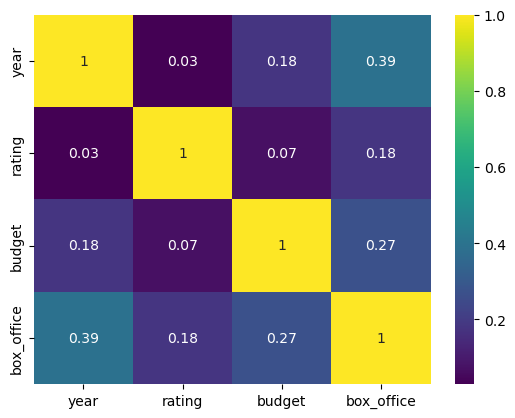

In [11]:
corr = round(movies_data.corr(), 2)
sns.heatmap(corr, annot= True, cmap='viridis')

In [12]:
z_scores = numerical_data[numerical_data.columns[1:]].apply(lambda x: (x - x.mean()) / x.std())
outliers = (z_scores > 3) | (z_scores < -3)
print(outliers.sum())

rating        7
run_time      2
budget        2
box_office    5
dtype: int64


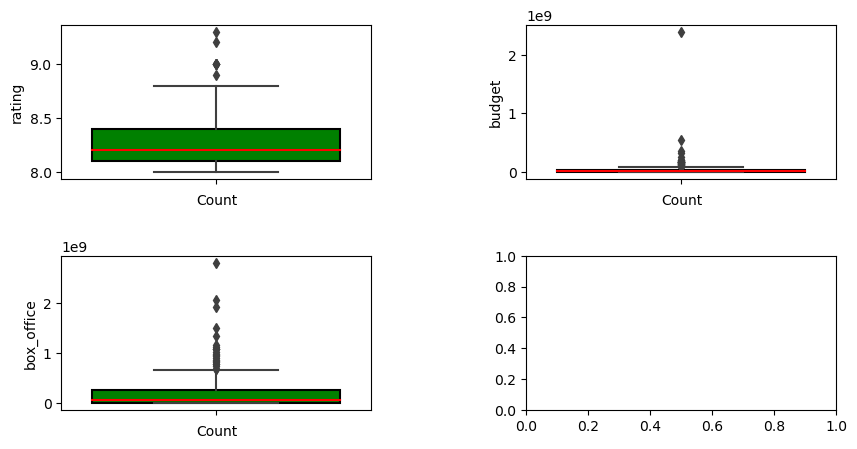

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, col in enumerate(numerical_data.columns[1:2].append(numerical_data.columns[3:])):
    sns.boxplot(y=col, data=numerical_data, ax=axs[i], boxprops={'color': 'green', 'edgecolor': 'black'}, medianprops={'color': 'red'})
    axs[i].set_ylabel(col)
    axs[i].set_xlabel('Count')

---
* #### As we can see from the code above, we can conclude that:
    - ##### There is no strong correlation between the data, since the values ranges from `0.03-0.4`, which means they are weakly postive correlated.
    - ##### We used `z-score` method to identify number of possible outliers in our data, without plotting `Box plot, Violin plot` with a threshold of ±3.

In [14]:
value_counts = numerical_data['rating'].value_counts()
print(value_counts[value_counts > 1])

8.1    68
8.2    55
8.3    38
8.4    30
8.5    22
8.6    13
8.8     7
9.0     5
8.0     5
8.7     4
Name: rating, dtype: int64


---
#### For instance, if we take rating column, and get their counts, we can see that most of our movies in the data has a rate of `8.1`, thus we may conclude that there is credibility in the ratings.
* #### We can also find the `highest-rated` movie in each genre by:
    - ##### Group the movies by genre and find the highest-rated movie in each genre.
    - ##### And simple print the top-rated movies in each genre.

In [15]:
top_movies_by_genre = movies_data.groupby("genre").apply(lambda x: x.loc[x["rating"].idxmax()])
top_movies_by_genre[["rating", "name"]].head()

,rating,name
genre,,
"Action,Adventure",8.4,Indiana Jones and the Raiders of the Lost Ark
"Action,Adventure,Comedy",8.1,The General
"Action,Adventure,Drama",9.0,The Lord of the Rings: The Return of the King
"Action,Adventure,Fantasy",8.7,Star Wars: Episode V - The Empire Strikes Back
"Action,Adventure,Mystery",8.3,North by Northwest


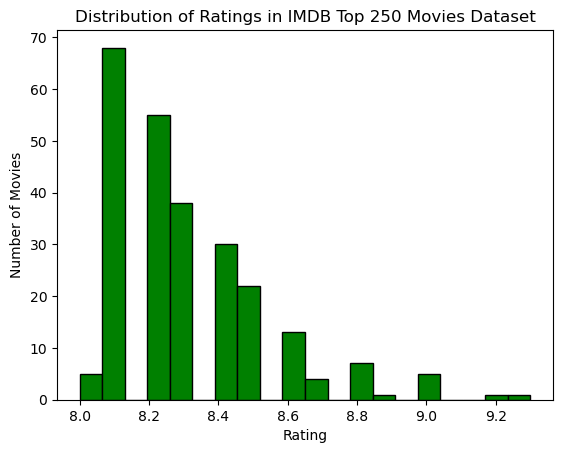

In [16]:
# Plot the distribution of ratings using a histogram
plt.hist(movies_data["rating"], bins=20, edgecolor='black', color='green')
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.title("Distribution of Ratings in IMDB Top 250 Movies Dataset")
plt.show()

---
* ### From the above graph, we have plotted the distribution of the `rating` column in our data, and we can see that:
    - #### The Distribution kinda right skewed, thus:
        + ##### It indicates that the majority of the data points in the column are concentrated on the left side of the distribution:
            * ###### We now know that we can focus on creating relevant features that capture important patterns and variations within that range. By engineering features that emphasize this portion of the distribution, we can potentially improve the predictive power of our model.
            * ###### Knowing that our distribution is right-skewed, guide us in selecting suitable modeling techniques. `For example`, algorithms that are robust to outliers and can handle skewed distributions, such as decision trees or random forests, may be preferred over models that assume a normal distribution, like linear regression
        + ##### The median will be smaller than the mean due to the influence of the skewed tail. It indicates that the typical value or the center of the distribution is closer to the left side.

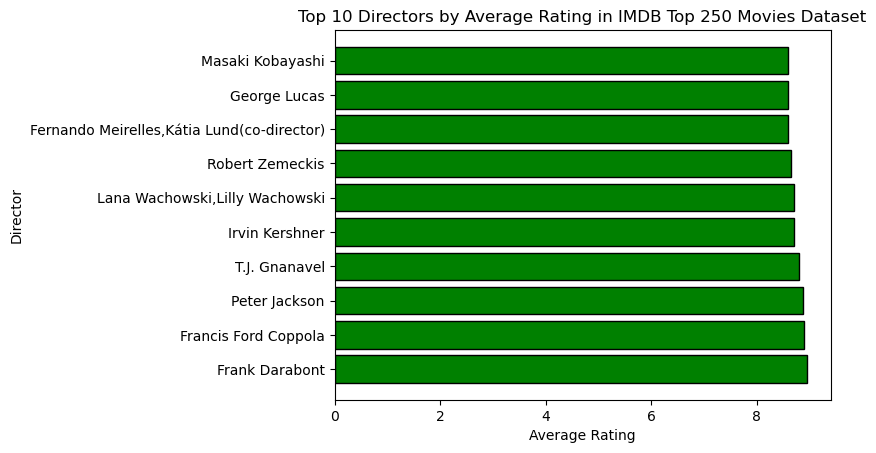

In [17]:
director_ratings = movies_data.groupby("directors")["rating"].mean()
director_ratings = director_ratings.sort_values(ascending=False)

top_directors = director_ratings.head(10)
plt.barh(top_directors.index, top_directors.values, edgecolor='black', color='green')
plt.xlabel("Average Rating")
plt.ylabel("Director")
plt.title("Top 10 Directors by Average Rating in IMDB Top 250 Movies Dataset")
plt.show()

---
* ### From the above graph, as it shows that we got the top 10 directors of our data with respect to the `rating` column in our data, and we can implement that by:
    - #### Group the movies by director and calculate the average rating for each director.
    - #### Sort the directors by average rating in descending order.
    - #### And finally, plot the top 10 directors by average rating using `horizontal bar` plot.

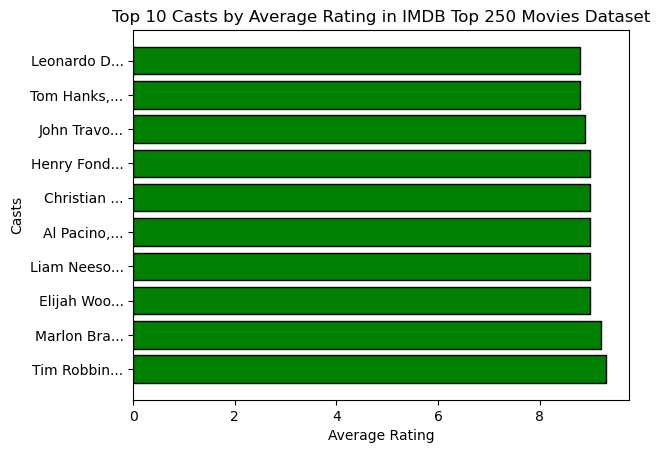

In [18]:
casts_ratings = movies_data.groupby("casts")["rating"].mean()
casts_ratings = casts_ratings.sort_values(ascending=False)
top_casts = casts_ratings.head(10)
shortened_labels = [name[:10] + '...' if len(name) > 10 else name for name in top_casts.index]
plt.barh(top_casts.index, top_casts.values, edgecolor='black', color='green')
plt.yticks(top_casts.index, shortened_labels)
plt.xlabel("Average Rating")
plt.ylabel("Casts")
plt.title("Top 10 Casts by Average Rating in IMDB Top 250 Movies Dataset")
plt.show()

---
* ### From the above graph, as it shows that we got the top 10 casts of our movies data with respect to the `rating` column in our data, and we can implement that by:
    - #### Group the movies by casts and calculate the average rating for each cast.
    - #### Sort the actors by average rating in descending order.
    - #### Get a shortened text of each cast in our data.
    - #### And finally, plot the top 10 actors by average rating using `horizontal bar` plot.

In [19]:
director_movies = movies_data.groupby("directors")["name"].apply(list)
vectorizer = TfidfVectorizer()
movie_vectors = vectorizer.fit_transform(movies_data["name"])
cosine_sim = cosine_similarity(movie_vectors)

def recommend_directors(movie_title):
    movie_index = movies_data[movies_data["name"] == movie_title].index[0]
    director_similarities = {}
    for director, movies in director_movies.items():
        movie_indices = [movies_data[movies_data["name"] == title].index[0] for title in movies]
        director_similarities[director] = cosine_sim[movie_index, movie_indices].mean()
    top_directors = sorted(director_similarities, key=director_similarities.get, reverse=True)[:5]
    return top_directors

directros_recommended = recommend_directors("The Godfather")
rank = 0
print('The 5 highest directors recommended to watch their movies, with a similarity of "The Godfather" movie are:')
for director in directros_recommended:
    rank += 1
    print(str(rank) + ".", director)

The 5 highest directors recommended to watch their movies, with a similarity of "The Godfather" movie are:
1. Francis Ford Coppola
2. Peter Jackson
3. Jonathan Demme
4. Jim Sheridan
5. Gore Verbinski


---
* ### From the code up, as it shows from the usage example and the result, that we got the highest 5 recommendations for directors, based on a movie title, and we can implement that by:
    - #### Group the movies by director and create a list of the movies directed by each director.
    - #### Create a TF-IDF vectorizer to convert the movie titles to feature vectors.
    - #### Convert the movie titles to feature vectors.
    - #### Compute the cosine similarity matrix between the movie vectors.
    - #### Define a function which takes the movie title as a parameter, and it will:
        + ##### Find the index of the movie in the dataset.
        + ##### Compute the average cosine similarity between the selected movie and all other movies directed by each director.
        + ##### Sort the directors by their average cosine similarity and return the highest 5.
    - #### And finally, use our implementation with an example, to get a directors recommendations, with similarities to `The Godfather` movie.

In [20]:
dict_genres = {}
for genres in movies_data.genre:
    genre_list = genres.split(',')
    for g in genre_list:
        genre = g.strip()
        if genre not in dict_genres:
            dict_genres[genre] = 1
        else:
            dict_genres[genre] += 1

print(dict_genres)

{'Drama': 177, 'Crime': 51, 'Action': 50, 'Biography': 29, 'History': 10, 'Adventure': 60, 'Western': 7, 'Romance': 23, 'Sci-Fi': 20, 'Fantasy': 14, 'Mystery': 31, 'Family': 13, 'Thriller': 30, 'War': 23, 'Comedy': 45, 'Animation': 23, 'Music': 4, 'Horror': 5, 'Film-Noir': 4, 'Musical': 1, 'Sport': 5}


---
* ### From the code up, as it shows from the result that we got the numbers of movies for each genre, and we can implement that by:
    - #### Iterate over the `genre` column.
    - #### Split the genre values using commas and iterate over individual genres.
    - #### Trim leading and trailing whitespaces from each genre `If exists`.
    - #### Check if the genre is already in the dictionary, so that:
        + ##### If the genre does not exist in the dictionary, it adds the genre as a key with a value of 1.
        + ##### If the genre already exists in the dictionary, it increments the value by 1.

---
<a id="T.3"></a>
### Time Series Analysis:
* #### From the below graph, as it shows a line chart of the year-wise average rating of top-rated movies in the data, and we can implement that by:
    - ##### Group the movies by year and calculate the average rating for each year
    - ##### And finally, plot the year-wise average rating of top-rated movies using `line` chart plot.
* #### And we can conclude from the graph:
    - ##### It's kinda difficult to determine time series components presence, but we can see that there is:
        + ###### `Noise` component, since it represents the random or unpredictable fluctuations in the time series that cannot be attributed to other components.
        + ###### `Trend` component, since there is a semi-clear and persistent upward or downward movement in the time series plot.
        + ###### We can't see the presence of `Seasonality` component, since it's hard to determine if there is any repeated patterns or cycles that occur within a fixed time interval.
        + ###### We can't see the presence of `Level` component, since it's hard to determine if there is a part of the time series plot where the values there is like constant through a period of time, to present a horizontal line without any upward or downward movement.
    - ##### Peaks or high points in the plot indicate years when the mean rating was particularly high `For instance 1970 approx`, suggesting the presence of exceptionally well-received movies. Valleys or low points, on the other hand, indicate years when the mean rating was relatively low `For example 1935 approx`, indicating potential gaps in movie quality.
    - ##### There might be other insights can be concluded from the plots, it will be great to disciver by an expert in the field of the business.

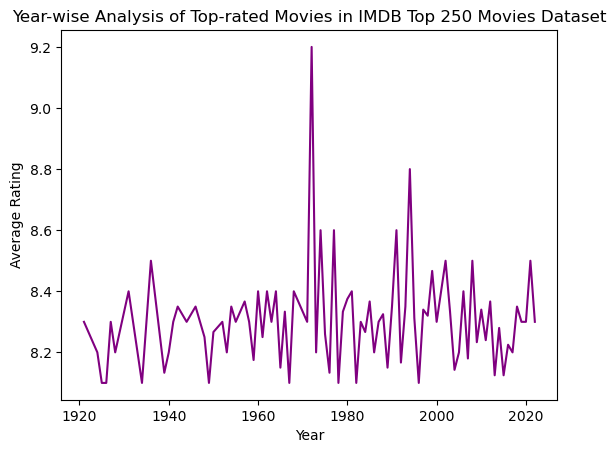

In [21]:
year_ratings = movies_data.groupby("year")["rating"].mean()
plt.plot(year_ratings.index, year_ratings.values, color='purple')
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Year-wise Analysis of Top-rated Movies in IMDB Top 250 Movies Dataset")
plt.show()

---
<a id="T.4"></a>
### Preprocessing The Data:
- #### In This Part, and Beside The Tiny Preprocessing Steps We Already Did [Here](#TPS), We Will:
    * ##### Drop unnecessary columns like `directors, casts, ...`, sicne it may not be an added value for the further modeling we may implement.
    * ##### Scale our numerical data using `minMax` scaler.
    * ##### Convert our text data into numerical using `Tf-idf` model.
* ##### `Ps:` We will use `minMax` scaler, as we would like to:
    - ###### Rescale the data to a fixed range, typically between 0 and 1.
    - ###### It would be useful when we want to ensure that all features have the same scale and are bound within a specific range.
    - ###### It can be sensitive to outliers since the range is determined by the minimum and maximum values. `But since the outliers in this context, for example the budget column, an extreme high value may not be considered as an outlier, and so on.`

In [22]:
from sklearn.preprocessing import MinMaxScaler
movies_data.drop(['casts', 'directors',	'writers'], axis=1, inplace= True)
scaler = MinMaxScaler()
scaler.fit(movies_data[['budget', 'box_office']])
scaled_data = scaler.transform(movies_data[['budget', 'box_office']])

genres = movies_data['genre'].tolist()
certificates = movies_data['certificate'].tolist()
taglines = movies_data['tagline'].tolist()

tfidf_genres = TfidfVectorizer()
tfidf_certificate = TfidfVectorizer()
tfidf_tagline = TfidfVectorizer()

tfidf_genres.fit(genres)
tfidf_certificate.fit(certificates)
tfidf_tagline.fit(taglines)

feature_names_genres = tfidf_genres.get_feature_names()
feature_names_certificates = tfidf_certificate.get_feature_names()
feature_names_taglines = tfidf_tagline.get_feature_names()

def Text_Score(text, tfidf, feature_names):
    tfidf_matrix= tfidf.transform([text]).todense()
    feature_index = tfidf_matrix[0,:].nonzero()[1]
    tfidf_scores = zip([feature_names[i] for i in feature_index], [tfidf_matrix[0, x] for x in feature_index])
    text_dict = dict(tfidf_scores)
    text_scores = text_dict.values()
    return sum(text_scores)
movies_data['genre'] = movies_data['genre'].apply(lambda x: Text_Score(x, tfidf_genres, feature_names_genres))
movies_data['certificate'] = movies_data['certificate'].apply(lambda x: Text_Score(x, tfidf_certificate, feature_names_certificates))
movies_data['tagline'] = movies_data['tagline'].apply(lambda x: Text_Score(x, tfidf_tagline, feature_names_taglines))

In [23]:
movies_data.head()

,name,year,rating,genre,certificate,run_time,tagline,budget,box_office
0,The Shawshank Redemption,1994,9.3,1.000000,0.000000,0 days 02:22:00,2.802459,25000000.0,2.888450e+07
1,The Godfather,1972,9.2,1.349229,0.000000,0 days 02:55:00,2.170079,6000000.0,2.503418e+08
2,The Dark Knight,2008,9.0,1.672428,1.401507,0 days 02:32:00,1.722828,185000000.0,1.006234e+09
3,The Godfather Part II,1974,9.0,1.349229,0.000000,0 days 03:22:00,2.727368,13000000.0,4.796192e+07
4,12 Angry Men,1957,9.0,1.349229,1.000000,0 days 01:36:00,2.692690,350000.0,9.550000e+02


---
<a id="T.5"></a>
### Feature Importance:
- #### In This Part, We Will Determine The Importance of Features in Our Data by:
    * ##### Pickup features, and a target column `X, Y` to implement our approach on. `Which rating column will be as the target`
    * ##### For `run_time` column:
        + ###### Since we have replaced `Not Available` run time of some movies in our data, we need to impute those values with `mean` value for example.
        + ###### Also as the data type for `run_time` column is not `int` or `float`, we might face some issues while trying to fit the model on the data, so we are going to:
            1. ###### Calculate total minutes of each movie, by calculating the total seconds of the movie, and divde it by `60`.
            2. ###### Store the values evaluated in a new column named `run_time_minutes`.
            3. ###### Drop the original column `run_time`, since we will use `run_time_minutes` instead to fit the model with.
    * ##### Split the data into training, and testing sets with test size of `20%` of the total data.
    * ##### Initialize `RandomForestRegressor` model, to fit the data on it.
    * ##### Get `Feature Importances`.
    * ##### Create a dataframe of feature importances.
    * ##### Finally, plot feature importances using `horizontal bar`plot, where the `x-axis` represents the importance value of the feature, and `y-axis` the features.

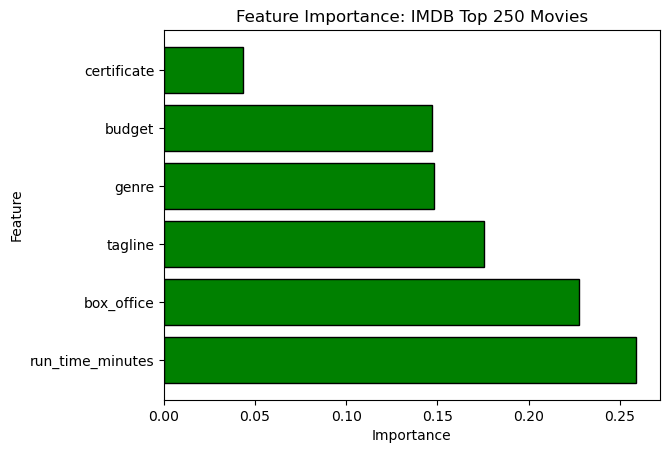

In [24]:
movies_data['run_time'].fillna(movies_data['run_time'].mean(), inplace=True)
movies_data['run_time_minutes'] = movies_data['run_time'].dt.total_seconds() / 60

movies_data.drop('run_time', axis=1, inplace=True)
X = movies_data.drop(['year', 'rating', 'name'], axis=1)
y = movies_data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

importances = rf.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.barh(feature_importances['Feature'], feature_importances['Importance'], edgecolor='black', color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance: IMDB Top 250 Movies')
plt.show()

---
<a id="T.6"></a>
### Conclusions:
* #### As a conclusion from the implemented approaches up, we can go out from this project with those points:
    + ##### It will be great to have more features that helps us in the analysis, such as `number of people watched the movie`, `how people watched the movie`, much more.
    + ##### Take into consideration the concluded points while implementing our approaches in this project.
    + ##### Further analysis can be applied to reveal more insights from this Treasure.
    + ##### >.....<